## Basic

In [1]:
import tensorflow as tf

In [2]:
message = tf.constant('Hello, World!') # tf.constant: 상수
print(message)

Tensor("Const:0", shape=(), dtype=string)


In [5]:
x1 = tf.constant(5)
x2 = tf.constant(10)
y = tf.add(x1, x2)  # can be written as "y = x1 + x2"
print(y)

Tensor("Add_1:0", shape=(), dtype=int32)


In [6]:
# 위에서는 정의만 진행됨 
# Session 객체의 run 메소드를 사용하여 실제 계산 (모델의 구성과 실행을 분리)

sess = tf.Session()

In [7]:
print(sess.run(message)) # 2.x 버전에서는 문자열로 출력되지만, 3.x 버전에서는 byte 자료형

b'Hello, World!'


In [8]:
result = sess.run(message)

print(result)                                 
print(type(result))                           

b'Hello, World!'
<class 'bytes'>


**다양한 저장 공간 크기의 Chracter가 아닌 일련의 단일 바이트로 처리되는 텍스트 문자열**
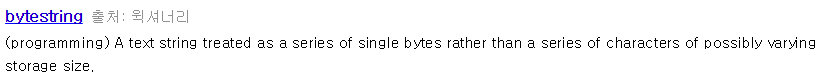

In [9]:
print(result.decode(encoding='utf-8'))        
print(type(result.decode(encoding='utf-8')))  

Hello, World!
<class 'str'>


In [11]:
print(sess.run([x1, x2, y]))

[5, 10, 15]


In [12]:
sess.close()

## Variable

In [13]:
import tensorflow as tf

In [14]:
X = tf.placeholder(tf.float32, [None, 3]) # None == not fixed
print(X)

Tensor("Placeholder:0", shape=(?, 3), dtype=float32)


In [15]:
x_data = [[1, 2, 3], [4, 5, 6]]

In [16]:
# tf.Variable: 그래프를 계산하면서 최적화 할 변수 & 신경망/머신러닝 모델의 핵심인 Parameter theta
# tf.random_normal: 정규분포로부터 랜덤한 값 추출

W = tf.Variable(tf.random_normal([3, 2]))
b = tf.Variable(tf.random_normal([2, 1]))

Instructions for updating:
Colocations handled automatically by placer.


In [17]:
# Model
model = tf.matmul(X, W) + b

In [18]:
sess = tf.Session()

In [19]:
# 위에서 설정한 Variable 들의 초기화
sess.run(tf.global_variables_initializer())

In [20]:
print('X :', x_data)
print()
print('W :', sess.run(W))
print()
print('b :', sess.run(b))

X : [[1, 2, 3], [4, 5, 6]]

W : [[ 0.30981043 -0.35210353]
 [-1.2031474   0.09894945]
 [-0.10404346  0.2822103 ]]

b : [[-1.9294584]
 [-0.9424845]]


In [21]:
print(sess.run(model, feed_dict={X: x_data})) # Placeholder : real-data

[[-4.3380733  -1.2370322 ]
 [-6.3432407  -0.16288966]]


In [22]:
sess.close()

## Linear Regression

In [23]:
import tensorflow as tf

In [24]:
x_data = [1, 2, 3]
y_data = [1, 2, 3]

In [25]:
# tf.random_uniform(shape, minval=0, maxval=None, dtype=tf.float32, seed=None, name=None)
# Outputs random values from a uniform distribution. (균등 분포 @ https://goo.gl/JqwmkZ)

W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.random_uniform([1], -1.0, 1.0))

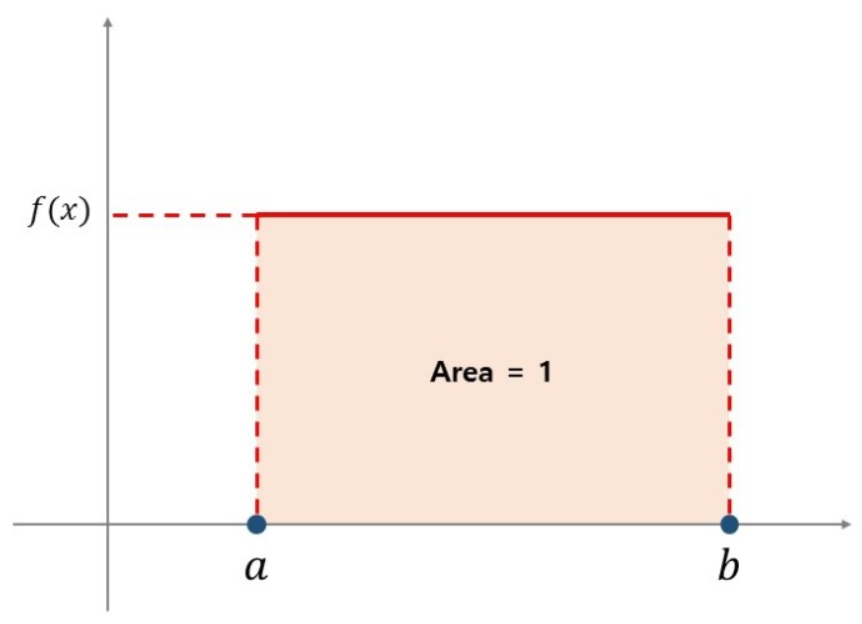

In [26]:
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)
print(X)
print(Y)

Tensor("Placeholder_1:0", dtype=float32)
Tensor("Placeholder_2:0", dtype=float32)


In [27]:
model = W * X + b

In [28]:
# Cost function (MSE)
loss = tf.reduce_mean(tf.square(model - Y)) # loss = tf.losses.mean_squared_error(model, Y)

In [29]:
optimizer = tf.train.GradientDescentOptimizer(0.1) # or learning_rate=0.1

In [30]:
train = optimizer.minimize(loss)

Instructions for updating:
Use tf.cast instead.


In [31]:
# 세션을 생성하고 변수를 초기화합니다.
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [32]:
# 100 epochs

for step in range(100):
    _, cost_val = sess.run([train, loss], feed_dict={X: x_data, Y: y_data})

    print(step, cost_val, sess.run(W), sess.run(b))

0 1.17198 [1.040417] [0.03289051]
1 0.014022276 [0.98953825] [0.01014562]
2 0.00018912625 [0.99524426] [0.01230118]
3 2.2860639e-05 [0.9947625] [0.01174324]
4 1.9895728e-05 [0.9949535] [0.01148959]
5 1.8928959e-05 [0.9950677] [0.01121027]
6 1.8029232e-05 [0.99518704] [0.01094113]
7 1.7173048e-05 [0.99530274] [0.01067809]
8 1.6357166e-05 [0.99541557] [0.01042137]
9 1.5580608e-05 [0.9955259] [0.01017089]
10 1.4839684e-05 [0.99563336] [0.00992635]
11 1.4135035e-05 [0.9957384] [0.00968774]
12 1.3464152e-05 [0.99584085] [0.00945485]
13 1.28239435e-05 [0.99594074] [0.00922753]
14 1.22151005e-05 [0.9960383] [0.00900571]
15 1.1634746e-05 [0.9961336] [0.00878925]
16 1.1081812e-05 [0.99622655] [0.00857794]
17 1.055553e-05 [0.9963172] [0.00837172]
18 1.005413e-05 [0.9964058] [0.00817048]
19 9.576821e-06 [0.9964922] [0.00797409]
20 9.12156e-06 [0.9965765] [0.00778238]
21 8.688513e-06 [0.9966588] [0.00759531]
22 8.275798e-06 [0.99673915] [0.00741273]
23 7.882594e-06 [0.9968175] [0.00723453]
24 7.50

In [33]:
print("X: 5, Y:", sess.run(model, feed_dict={X: 5}))

X: 5, Y: [4.9986343]


In [34]:
print("X: 3.5, Y:", sess.run(model, feed_dict={X: 3.5}))

X: 3.5, Y: [3.4993858]
